In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.express as px

from sklearn.cluster import KMeans, AffinityPropagation, DBSCAN, MeanShift, estimate_bandwidth
from scipy.cluster import hierarchy
import warnings
import os
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
from itertools import product
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('Mall_Customers.csv')
df_copy = df.copy()
df_copy2 = df.copy()

print(df.head())



Saving Mall_Customers.csv to Mall_Customers.csv
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.dtypes


,0
CustomerID,int64
Gender,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [ ]:
df.isnull().sum()


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
print("Mean of Annual Income (k$) of Female:",df['Annual Income (k$)'].loc[df['Gender'] == 'Female'].mean())
print("Mean of Annual Income (k$) of Male:",df['Annual Income (k$)'].loc[df['Gender'] == 'Male'].mean())

Mean of Annual Income (k$) of Female: 59.25
Mean of Annual Income (k$) of Male: 62.22727272727273


<Axes: ylabel='count'>

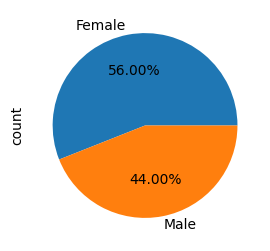

In [ ]:
plt.figure(figsize=(3,3))
pd.Series(df['Gender']).value_counts().plot(kind ='pie', autopct='%1.2f%%')

In [ ]:
df.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,97.562500,38.098214,59.250000,51.526786
Male,104.238636,39.806818,62.227273,48.511364


<ipython-input-9-59d16709bce1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Age', x='Gender', data=df, palette=gender_palette, ax=ax1)
<ipython-input-9-59d16709bce1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Annual Income (k$)', x='Gender', data=df, palette=gender_palette, ax=ax2)
<ipython-input-9-59d16709bce1>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Spending Score (1-100)', x='Gender', data=df, palette=gender_palette, ax=ax3)


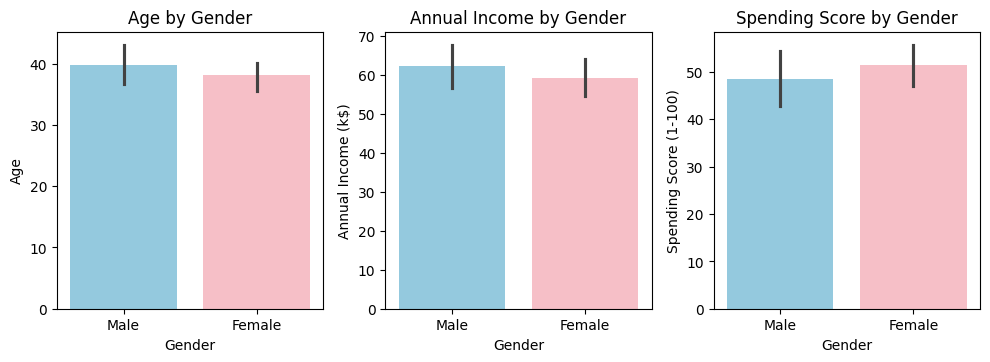

In [ ]:

gender_palette = {'Male': 'skyblue', 'Female': 'lightpink'}

fig = plt.figure(figsize=(10, 10))

# Plot 1
ax1 = fig.add_subplot(3, 3, 1)
sns.barplot(y='Age', x='Gender', data=df, palette=gender_palette, ax=ax1)
ax1.set_title('Age by Gender')

# Plot 2
ax2 = fig.add_subplot(3, 3, 2)
sns.barplot(y='Annual Income (k$)', x='Gender', data=df, palette=gender_palette, ax=ax2)
ax2.set_title('Annual Income by Gender')

# Plot 3
ax3 = fig.add_subplot(3, 3, 3)
sns.barplot(y='Spending Score (1-100)', x='Gender', data=df, palette=gender_palette, ax=ax3)
ax3.set_title('Spending Score by Gender')

plt.tight_layout()
plt.show()

In [ ]:
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

# Perform the Kolmogorov-Smirnov test for each numerical column
ks_results = {
    'Annual Income (k$)': ks_2samp(male_data['Annual Income (k$)'], female_data['Annual Income (k$)']),
    'Age': ks_2samp(male_data['Age'], female_data['Age']),
    'Spending Score (1-100)': ks_2samp(male_data['Spending Score (1-100)'], female_data['Spending Score (1-100)'])
}

# Format results into a DataFrame for clarity
ks_summary = pd.DataFrame({
    'Feature': ks_results.keys(),
    'KS Statistic': [result.statistic for result in ks_results.values()],
    'p-value': [result.pvalue for result in ks_results.values()]
})

ks_summary

,Feature,KS Statistic,p-value
0,Annual Income (k$),0.090097,0.778198
1,Age,0.115260,0.487007
2,Spending Score (1-100),0.135552,0.293541


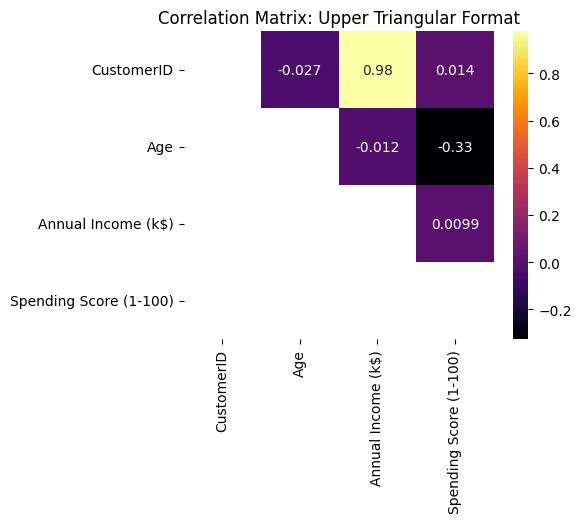

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

correlation_matrix = numeric_df.corr()

mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, cmap='inferno', annot=True, cbar=True, mask=mask)
plt.title('Correlation Matrix: Upper Triangular Format')
plt.show()


<ipython-input-12-c655c2ef1234>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
<ipython-input-12-c655c2ef1234>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Spending Score (1-100)'])
<ipython-input-12-c655c2ef1234>:9: UserWarning: 

`distplot` is a deprecated function and wil

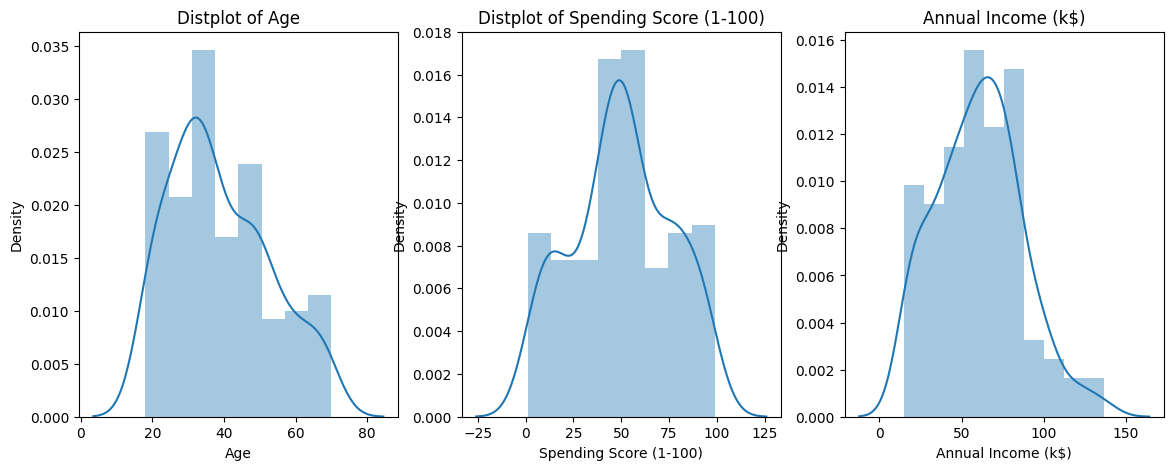

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.distplot(df['Age'])
plt.title('Distplot of Age')
plt.subplot(1,3,2)
sns.distplot(df['Spending Score (1-100)'])
plt.title('Distplot of Spending Score (1-100)')
plt.subplot(1,3,3)
sns.distplot(df['Annual Income (k$)'])
plt.title('Annual Income (k$)')
plt.show()

In [ ]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age_55above = df.Age[df.Age >= 55]


x_age = ['18-25', '26-35', '36-45', '46-55', '55+']
y_age = [len(age_18_25.values), len(age_26_35.values), len(age_36_45.values), len(age_46_55.values),
     len(age_55above.values)]


px.bar(data_frame = df, x = x_age, y = y_age, color = x_age,
       title = 'Number of customers per age group')


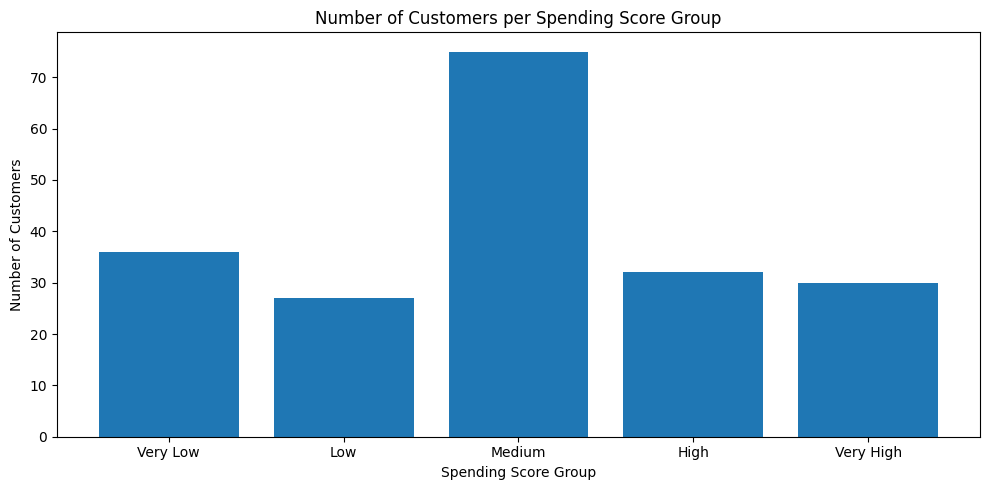

In [ ]:
# Define bins and labels
bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# Create a new column for spending group
df_copy2['Spending Group'] = pd.cut(df['Spending Score (1-100)'], bins=bins, labels=labels, include_lowest=True)

# Count of customers in each group
spending_group_counts = df_copy2['Spending Group'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 5))
plt.bar(spending_group_counts.index, spending_group_counts.values)
plt.title('Number of Customers per Spending Score Group')
plt.xlabel('Spending Score Group')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()


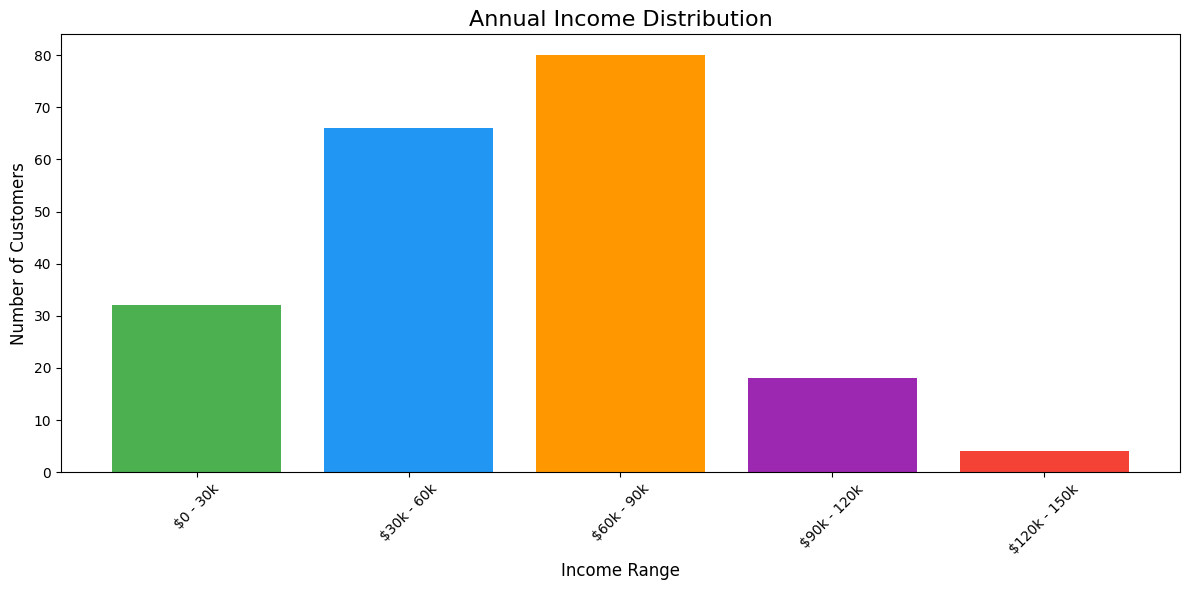

In [ ]:
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

# Define labels and values
aix = ["$0 - 30k", "$30k - 60k", "$60k - 90k", "$90k - 120k", "$120k - 150k"]
aiy = [len(ai0_30), len(ai31_60), len(ai61_90), len(ai91_120), len(ai121_150)]

# Define custom colors for bars
colors = ['#4CAF50', '#2196F3', '#FF9800', '#9C27B0', '#F44336']

# Create bar chart
plt.figure(figsize=(12, 6))
plt.bar(aix, aiy, color=colors)

# Add titles and labels
plt.title("Annual Income Distribution", fontsize=16)
plt.xlabel("Income Range", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df = df.drop(columns=['CustomerID'])

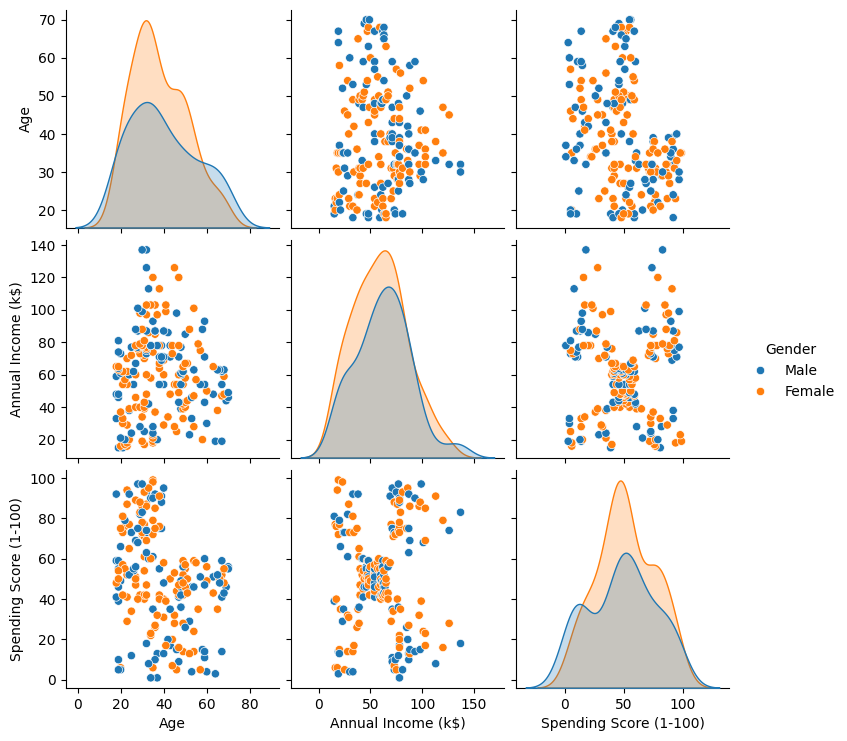

In [ ]:
sns.pairplot(df, hue='Gender', aspect=1)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

print(df.head())


   Gender       Age  Annual Income (k$)  Spending Score (1-100)
0    Male -1.424569           -1.738999               -0.434801
1    Male -1.281035           -1.738999                1.195704
2  Female -1.352802           -1.700830               -1.715913
3  Female -1.137502           -1.700830                1.040418
4  Female -0.563369           -1.662660               -0.395980


In [ ]:
X= df.iloc[:, [2,3]].values

In [ ]:
wcss=[]

# We always assume the max number of cluster would be 15
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,15):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


In [ ]:
silhouette_scores = []
k_range = range(2, 11)  # Test k from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)



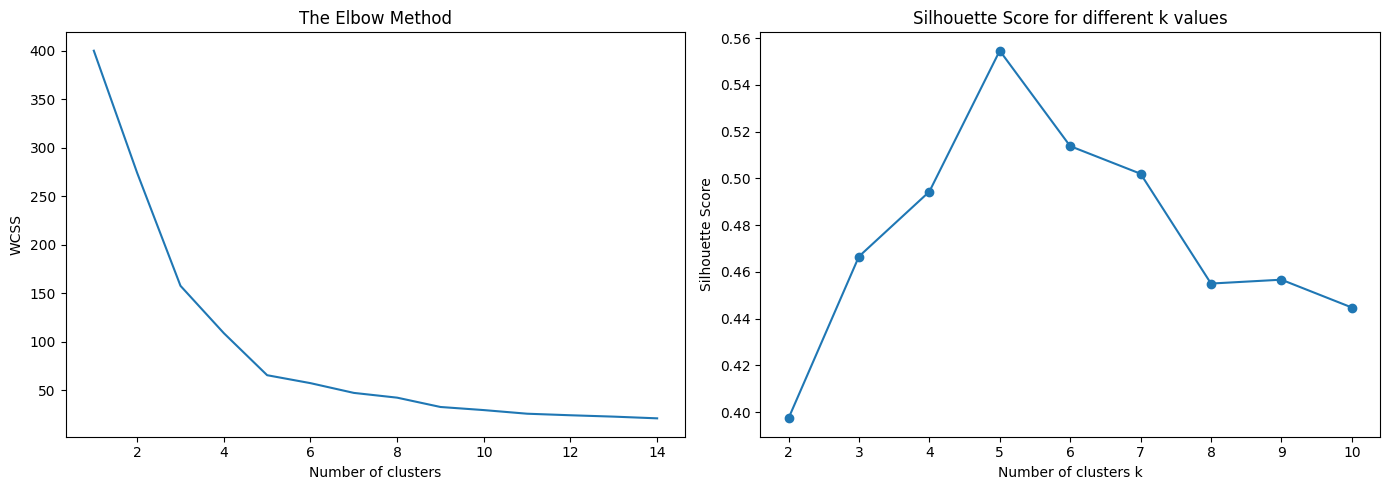

Best number of clusters by silhouette score: 5


In [ ]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot Elbow Method (ensure len(wcss) matches x-axis)
ax1.plot(range(1, len(wcss)+1), wcss)  # Automatically matches length
ax1.set_title('The Elbow Method')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS')

# Plot Silhouette Scores
ax2.plot(k_range, silhouette_scores, marker='o')
ax2.set_xlabel('Number of clusters k')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Score for different k values')

plt.tight_layout()
plt.show()

best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters by silhouette score: {best_k}")

In [ ]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

#For unsupervised learning we use "fit_predict()" wherein for supervised learning we use "fit_tranform()"
#y_kmeans is the final model . Now how and where we will deploy this model in production is depends on what tool we are using.
#This use case is very common and it is used in BFS industry(credit card) and retail for customer segmenattion.

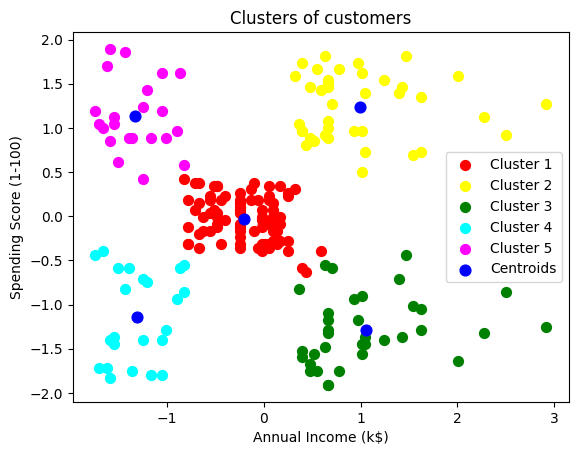

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'yellow', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 50, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 60, c = 'blue', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

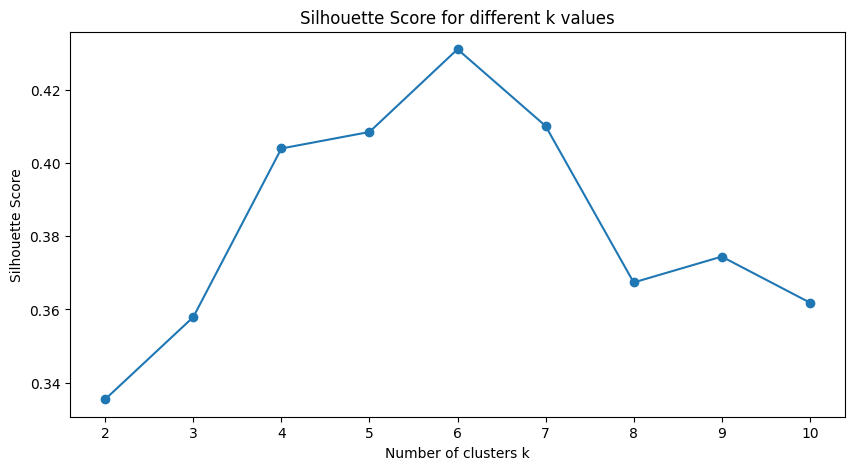

Best number of clusters by silhouette score: 6


In [ ]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

silhouette_scores = []
k_range = range(2, 11)


for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different k values')
plt.show()

best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters by silhouette score: {best_k}")

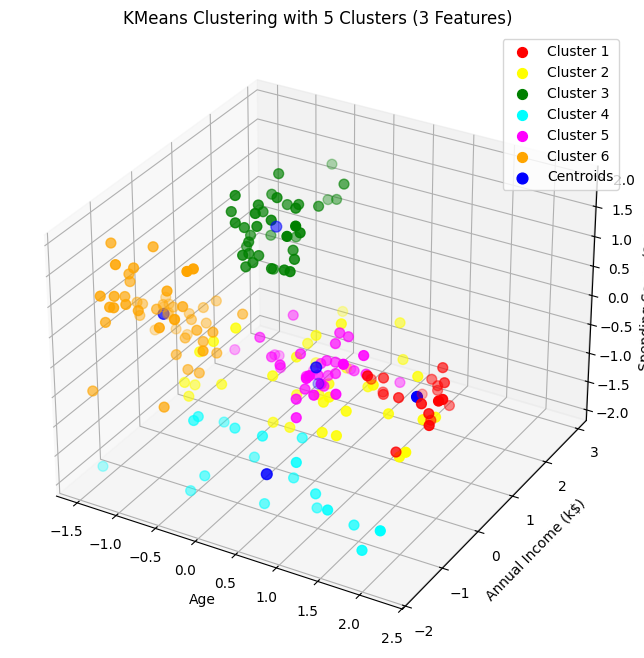

In [ ]:
kmeansmodel = KMeans(n_clusters=6, init='k-means++', random_state=0)
y_kmeans = kmeansmodel.fit_predict(X)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s=50, c='red', label='Cluster 1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s=50, c='yellow', label='Cluster 2')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s=50, c='green', label='Cluster 3')
ax.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s=50, c='cyan', label='Cluster 4')
ax.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], s=50, c='magenta', label='Cluster 5')
ax.scatter(X[y_kmeans == 5, 0], X[y_kmeans == 5, 1], X[y_kmeans == 5, 2], s=50, c='orange', label='Cluster 6')

ax.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], kmeansmodel.cluster_centers_[:, 2],
           s=60, c='blue', label='Centroids')

ax.set_title('KMeans Clustering with 5 Clusters (3 Features)')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()

plt.show()


In [ ]:
Y =  df_copy.drop(['Gender' , 'CustomerID' ] , axis= 1)

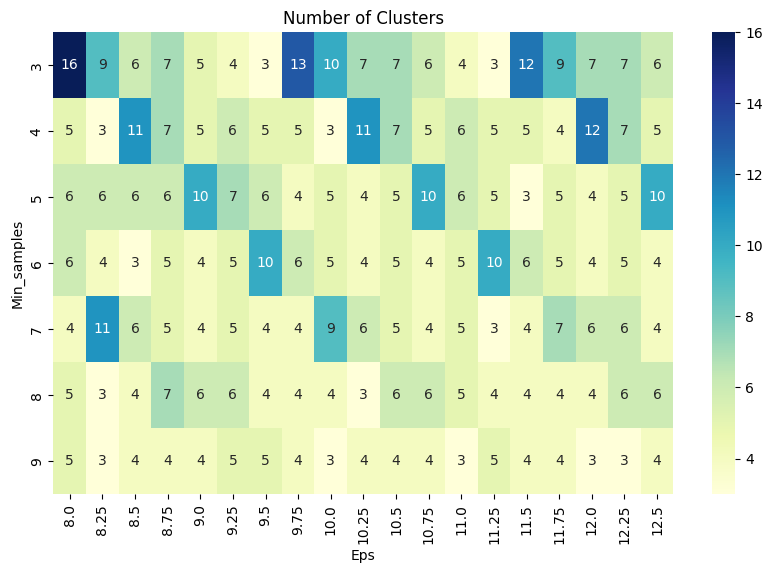

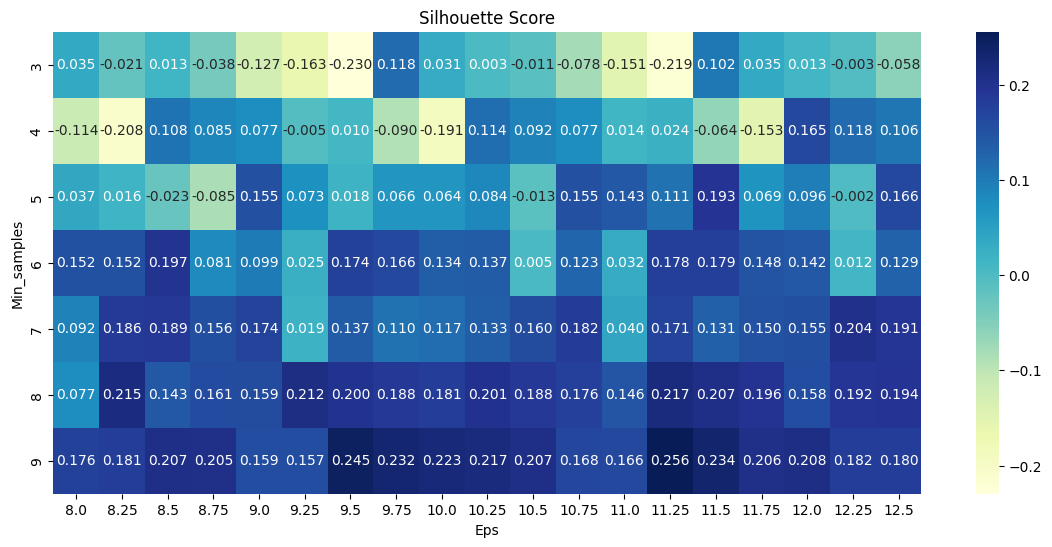

In [ ]:
eps_values = np.arange(8, 12.75, 0.25)
min_samples = np.arange(3, 10)
DBSCAN_params = list(product(eps_values, min_samples))

n_clusters = []
sil_scores = []

for eps, min_s in DBSCAN_params:
    clustering = DBSCAN(eps=eps, min_samples=min_s).fit(Y)
    labels = clustering.labels_
    n_clusters.append(len(set(labels)) - (1 if -1 in labels else 0))
    if len(set(labels)) > 1:
        sil_scores.append(silhouette_score(Y, labels))
    else:
        sil_scores.append(np.nan)


n_clusters_df = pd.DataFrame(np.array(n_clusters).reshape(len(min_samples), len(eps_values)),
                             index=min_samples, columns=eps_values)
sil_score_df = pd.DataFrame(np.array(sil_scores).reshape(len(min_samples), len(eps_values)),
                            index=min_samples, columns=eps_values)


plt.figure(figsize=(10, 6))
sns.heatmap(n_clusters_df, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Number of Clusters")
plt.xlabel("Eps")
plt.ylabel("Min_samples")
plt.show()

# رسم heatmap silhouette score
plt.figure(figsize=(14, 6))
sns.heatmap(sil_score_df, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Silhouette Score")
plt.xlabel("Eps")
plt.ylabel("Min_samples")
plt.show()

In [ ]:
dbscan = DBSCAN(eps=11.25, min_samples=9)
labels = dbscan.fit_predict(Y)


Y['Cluster'] = labels

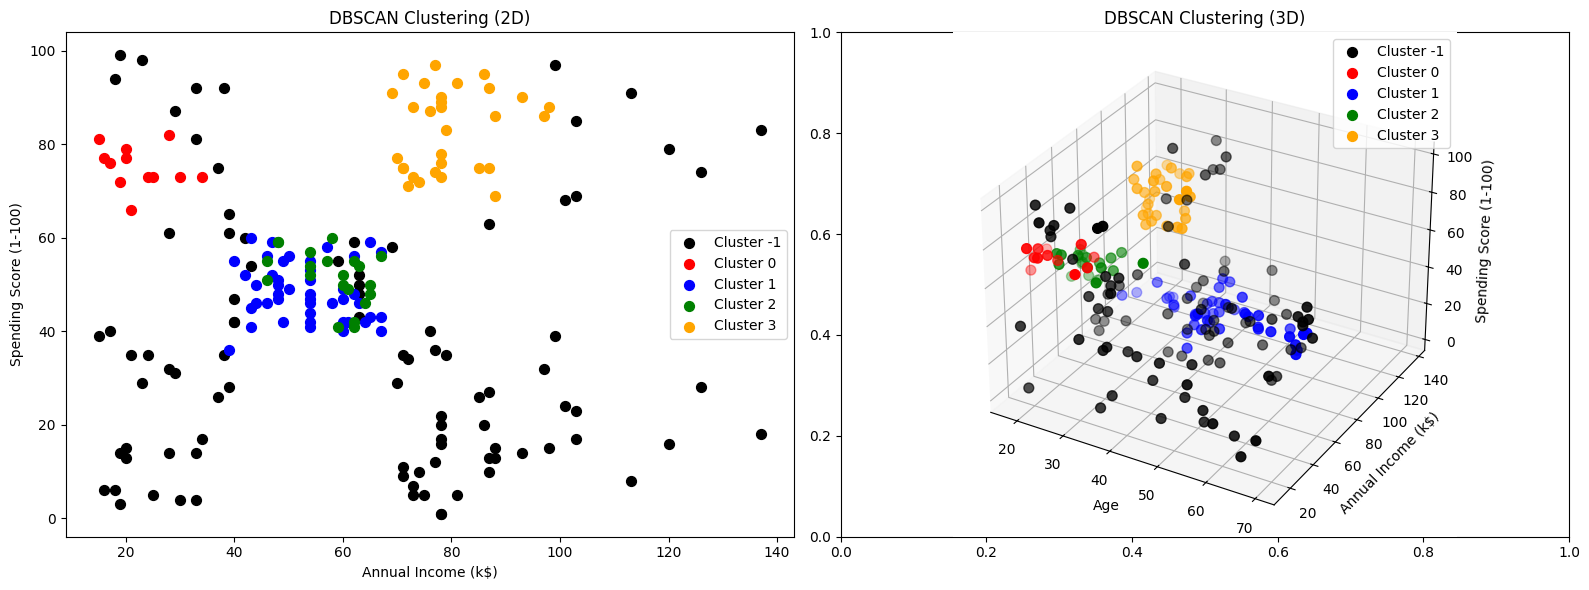

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D projection

# Define cluster colors (shared by both plots)
cluster_colors = {
    -1: 'black',
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'orange',
    4: 'purple'
}

# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))  # Wider figure to fit both plots

# --- LEFT PLOT (2D Scatter) ---
for cluster_label in sorted(Y['Cluster'].unique()):
    cluster_data = Y[Y['Cluster'] == cluster_label]
    ax1.scatter(
        cluster_data['Annual Income (k$)'],
        cluster_data['Spending Score (1-100)'],
        label=f'Cluster {cluster_label}',
        color=cluster_colors.get(cluster_label, 'gray'),
        s=50  # Adjust marker size if needed
    )
ax1.set_xlabel('Annual Income (k$)')
ax1.set_ylabel('Spending Score (1-100)')
ax1.set_title('DBSCAN Clustering (2D)')
ax1.legend()

# --- RIGHT PLOT (3D Scatter) ---
ax2 = fig.add_subplot(122, projection='3d')  # 122 means 1 row, 2 cols, 2nd subplot
for cluster_label in sorted(Y['Cluster'].unique()):
    cluster_data = Y[Y['Cluster'] == cluster_label]
    ax2.scatter(
        cluster_data['Age'],
        cluster_data['Annual Income (k$)'],
        cluster_data['Spending Score (1-100)'],
        label=f'Cluster {cluster_label}',
        color=cluster_colors.get(cluster_label, 'gray'),
        s=50
    )
ax2.set_xlabel('Age')
ax2.set_ylabel('Annual Income (k$)')
ax2.set_zlabel('Spending Score (1-100)')
ax2.set_title('DBSCAN Clustering (3D)')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
cluster_counts = Y['Cluster'].value_counts().sort_index()
cluster_counts

,count
Cluster,
-1,92
0,12
1,45
2,21
3,30


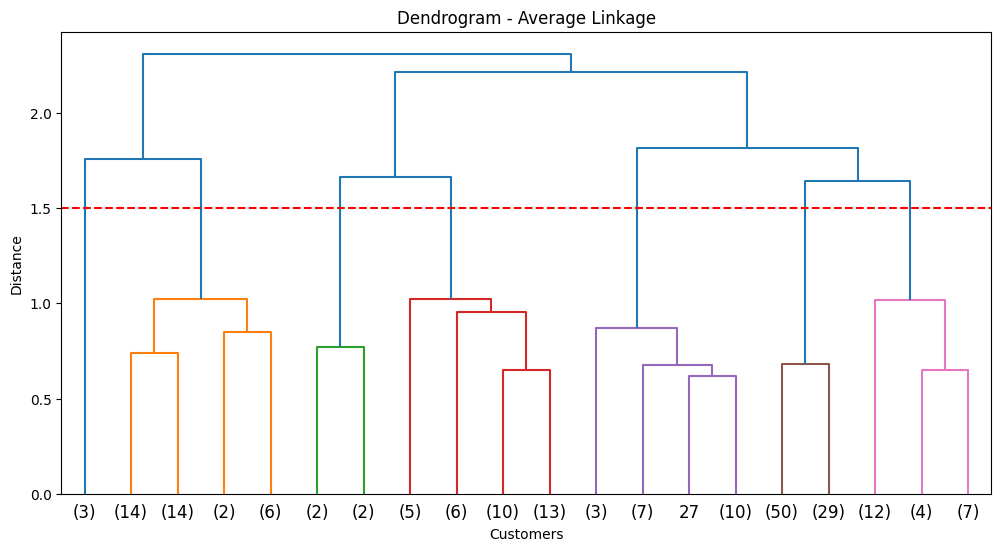

In [ ]:
X_scaled = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

plt.figure(figsize=(12, 6))
Z_average = linkage(X_scaled, method='average')
dendrogram(Z_average, truncate_mode='lastp', p=20)
plt.title('Dendrogram - Average Linkage')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.axhline(y=1.5, color='r', linestyle='--')  # Adjust threshold
plt.show()

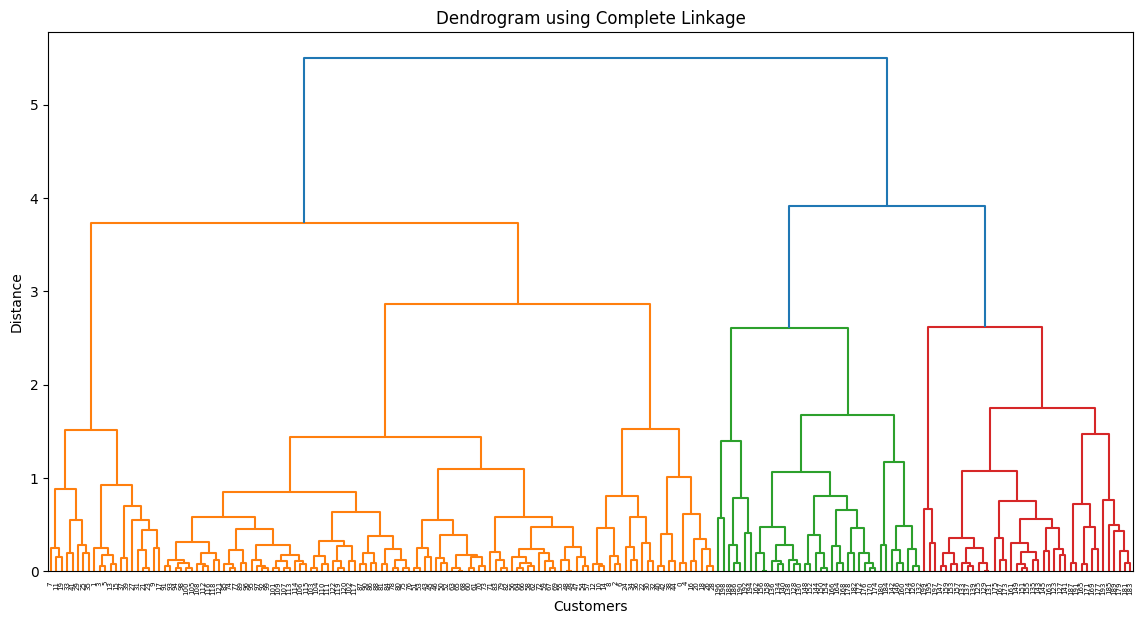

In [ ]:
df_numeric = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()
df_numeric.columns = ['Income', 'Score']
dist = pdist(df_numeric, metric='euclidean')
Z = hierarchy.linkage(dist, method='complete')
plt.figure(figsize=(14, 7))
hierarchy.dendrogram(Z)
plt.title("Dendrogram using Complete Linkage")
plt.xlabel("Customers")
plt.ylabel("Distance")
plt.show()


In [ ]:
def compute_wcss(X_scaled, method='average', max_clusters=10):
    wcss = []
    for k in range(1, max_clusters + 1):
        clustering = AgglomerativeClustering(n_clusters=k, linkage=method)
        clustering.fit(X_scaled)

        # Calculate WCSS manually
        wcss_k = 0
        for i in range(k):
            cluster_points = X_scaled[clustering.labels_ == i]
            if len(cluster_points) > 0:
                centroid = np.mean(cluster_points, axis=0)
                wcss_k += np.sum((cluster_points - centroid) ** 2)
        wcss.append(wcss_k)
    return wcss

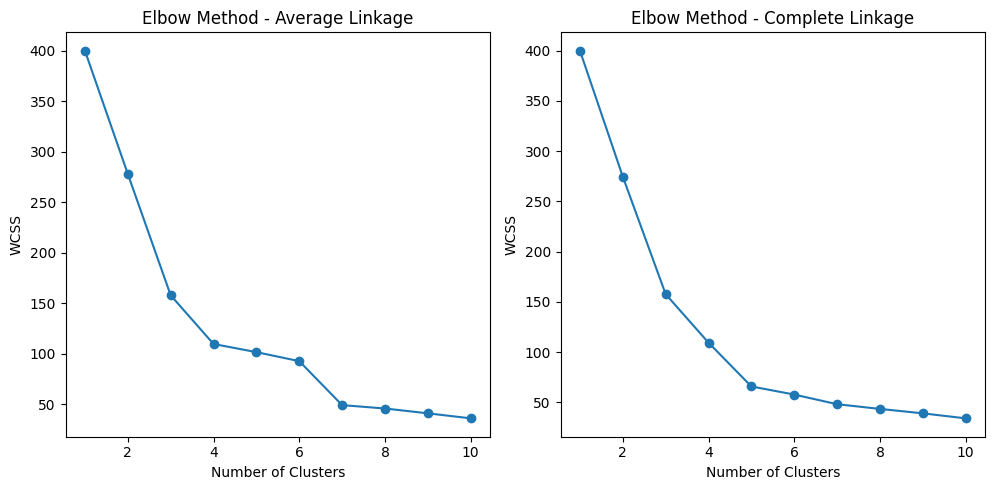

In [ ]:
max_clusters = 10
linkage_methods = ['average', 'complete']

plt.figure(figsize=(15, 5))
for i, method in enumerate(linkage_methods, 1):
    wcss = compute_wcss(X_scaled, method=method, max_clusters=max_clusters)
    plt.subplot(1, 3, i)
    plt.plot(range(1, max_clusters + 1), wcss, marker='o')
    plt.title(f'Elbow Method - {method.capitalize()} Linkage')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')

plt.tight_layout()
plt.show()

In [ ]:
def compute_silhouette(X_scaled, method='average', max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        clustering = AgglomerativeClustering(n_clusters=k, linkage=method)
        labels = clustering.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, labels)
        silhouette_scores.append(score)
    return silhouette_scores

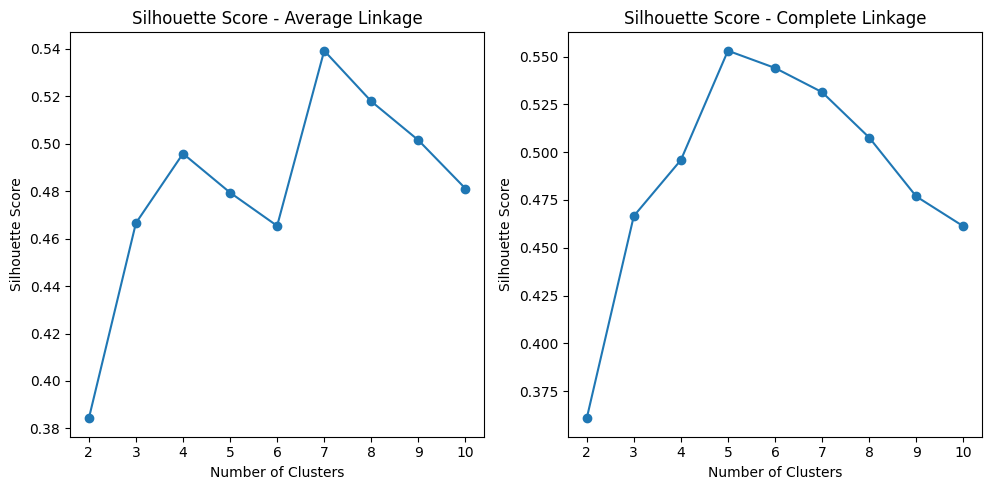

In [ ]:
plt.figure(figsize=(15, 5))
for i, method in enumerate(linkage_methods, 1):
    scores = compute_silhouette(X_scaled, method=method, max_clusters=max_clusters)
    plt.subplot(1, 3, i)
    plt.plot(range(2, max_clusters + 1), scores, marker='o')
    plt.title(f'Silhouette Score - {method.capitalize()} Linkage')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

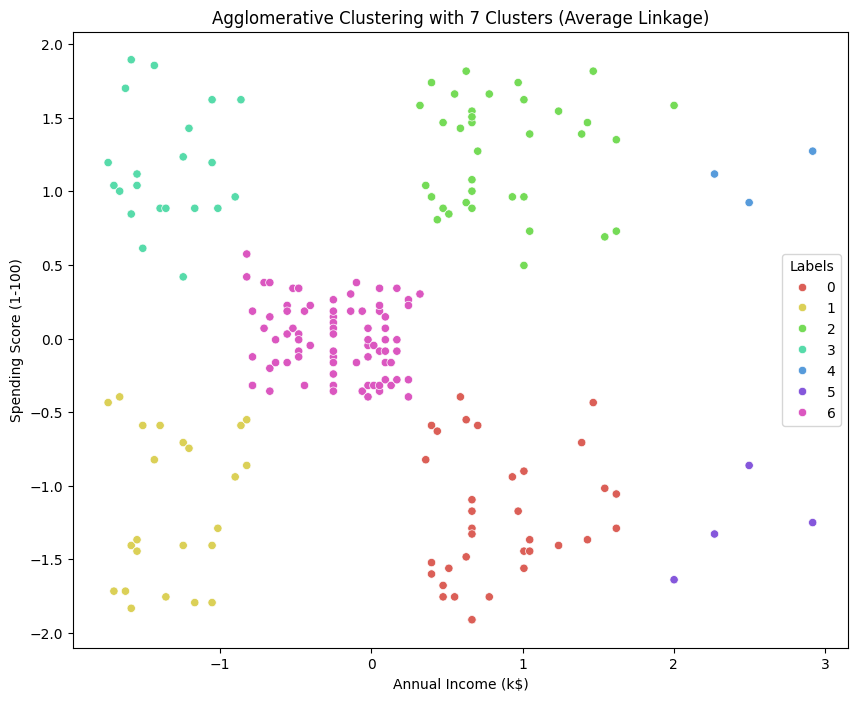

In [ ]:
df_numeric = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()
df_numeric.columns = ['Income', 'Score']

agglom = AgglomerativeClustering(n_clusters=7, linkage='average').fit(df_numeric)

df['Labels'] = agglom.labels_

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Labels',
                palette=sns.color_palette('hls', 7))
plt.title('Agglomerative Clustering with 7 Clusters (Average Linkage)')
plt.show()


In [ ]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Labels
0,Male,-1.424569,-1.738999,-0.434801,1
1,Male,-1.281035,-1.738999,1.195704,3
2,Female,-1.352802,-1.700830,-1.715913,1
3,Female,-1.137502,-1.700830,1.040418,3
4,Female,-0.563369,-1.662660,-0.395980,1


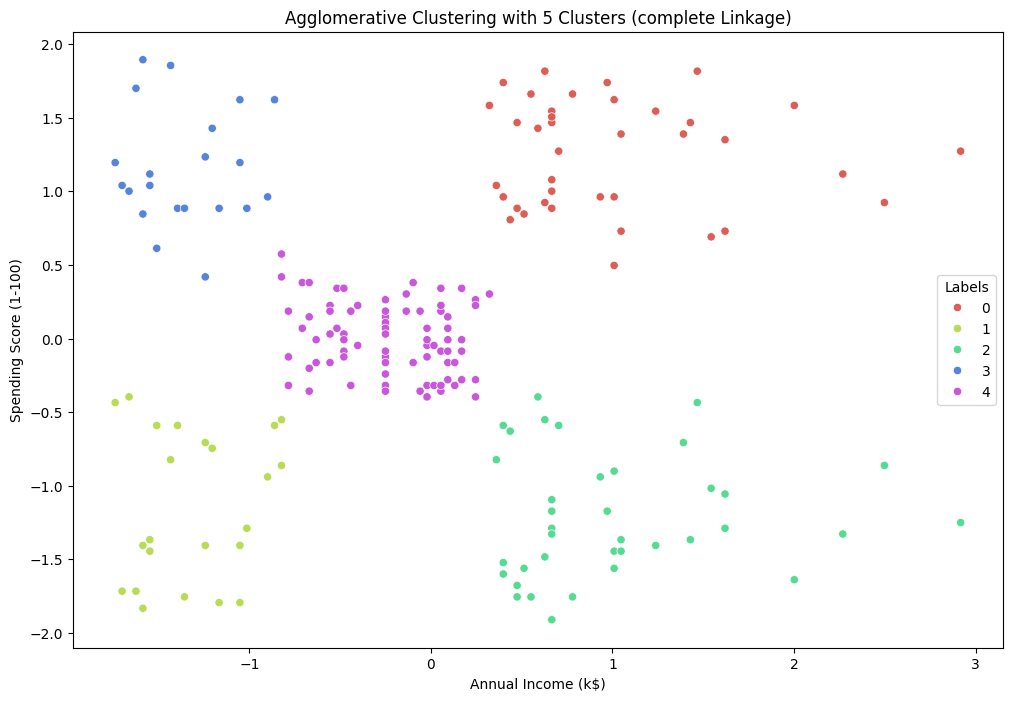

In [ ]:
df_numeric = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()
df_numeric.columns = ['Income', 'Score']

agglom = AgglomerativeClustering(n_clusters=5, linkage='complete').fit(df_numeric)

df['Labels'] = agglom.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Labels',
                palette=sns.color_palette('hls', 5))
plt.title('Agglomerative Clustering with 5 Clusters (complete Linkage)')
plt.show()

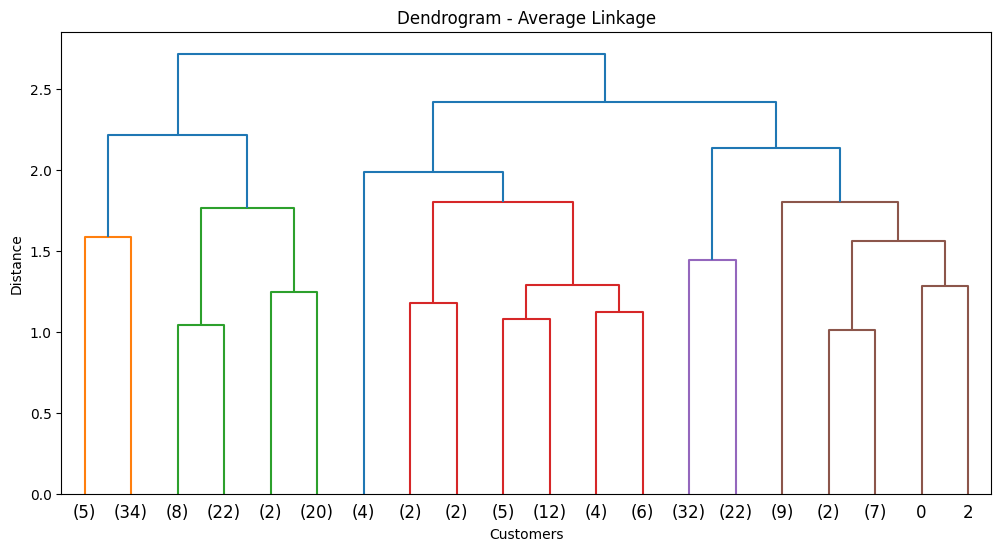

In [ ]:
X_scaled = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


X_scaled = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

plt.figure(figsize=(12, 6))
Z_average = linkage(X_scaled, method='average')
dendrogram(Z_average, truncate_mode='lastp', p=20)
plt.title('Dendrogram - Average Linkage')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

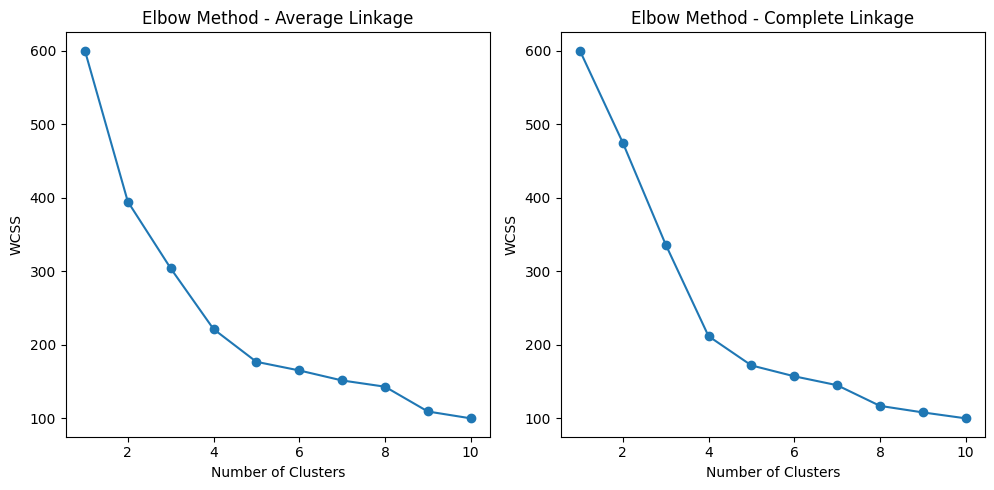

In [ ]:
max_clusters = 10
linkage_methods = ['average', 'complete']

plt.figure(figsize=(15, 5))
for i, method in enumerate(linkage_methods, 1):
    wcss = compute_wcss(X_scaled, method=method, max_clusters=max_clusters)
    plt.subplot(1, 3, i)
    plt.plot(range(1, max_clusters + 1), wcss, marker='o')
    plt.title(f'Elbow Method - {method.capitalize()} Linkage')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')

plt.tight_layout()
plt.show()

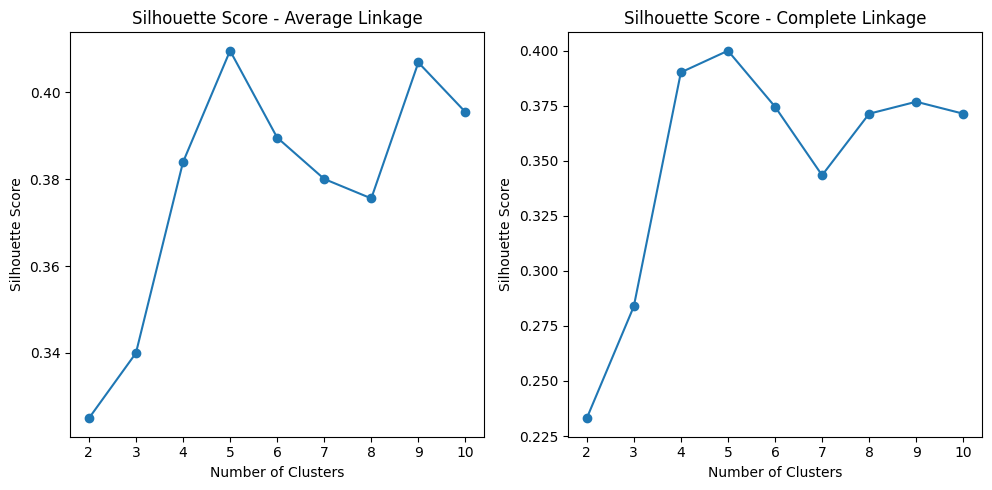

In [ ]:
plt.figure(figsize=(15, 5))
for i, method in enumerate(linkage_methods, 1):
    scores = compute_silhouette(X_scaled, method=method, max_clusters=max_clusters)
    plt.subplot(1, 3, i)
    plt.plot(range(2, max_clusters + 1), scores, marker='o')
    plt.title(f'Silhouette Score - {method.capitalize()} Linkage')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

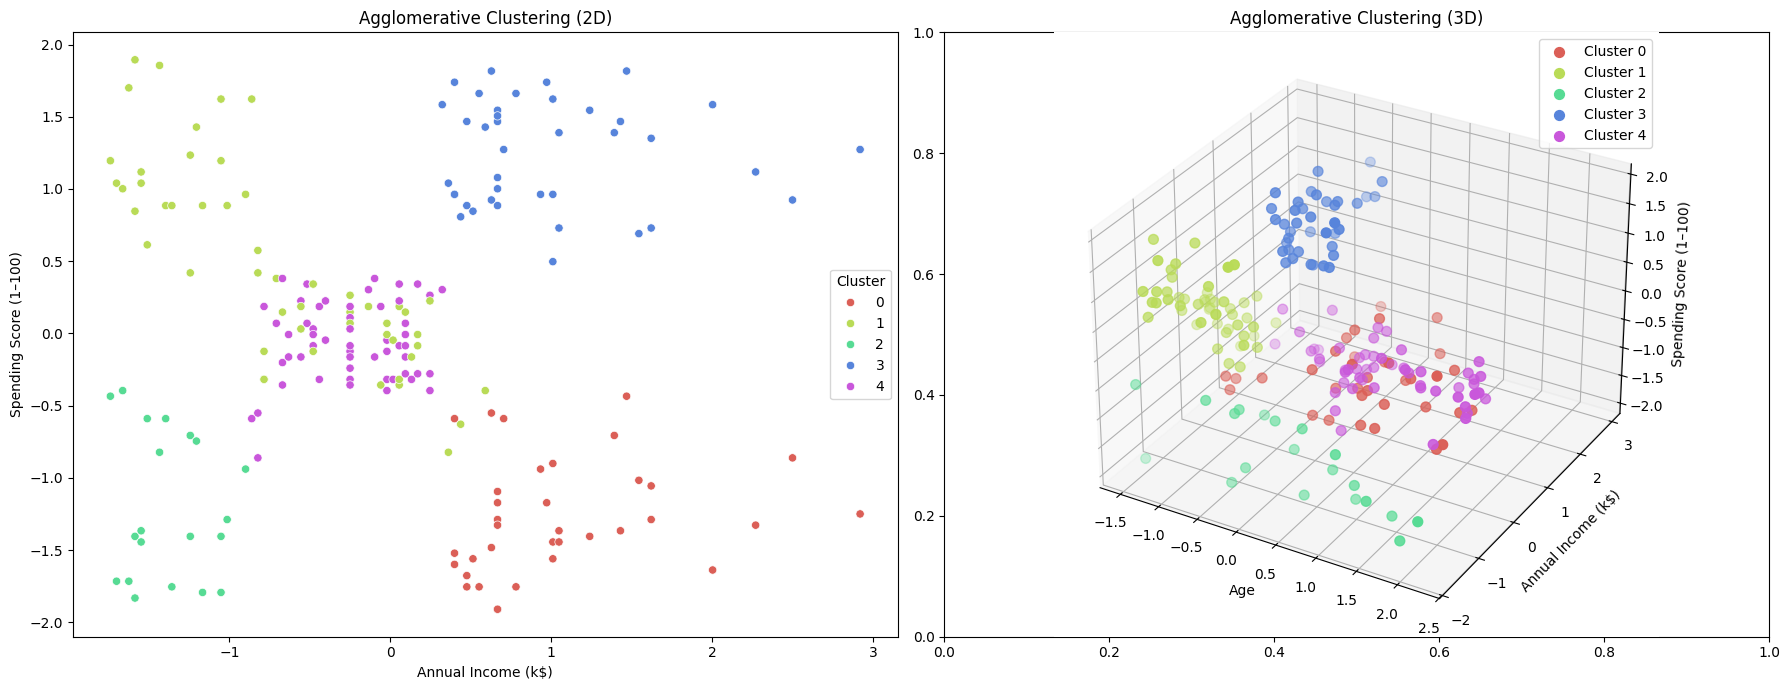

In [ ]:
# Prepare data (run once)
df_numeric = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()
df_numeric.columns = ['Age', 'Income', 'Score']
agglom = AgglomerativeClustering(n_clusters=5, linkage='average').fit(df_numeric)
df['Labels'] = agglom.labels_

# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))  # Wider figure (width=18, height=7)

# --- LEFT PLOT (2D Scatter) ---
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Labels',
    palette=sns.color_palette('hls', 5),
    ax=ax1  # Plot on the first subplot (ax1)
)
ax1.set_title('Agglomerative Clustering (2D)')
ax1.set_xlabel("Annual Income (k$)")
ax1.set_ylabel("Spending Score (1–100)")
ax1.legend(title='Cluster')

# --- RIGHT PLOT (3D Scatter) ---
ax2 = fig.add_subplot(122, projection='3d')  # 122 = 1 row, 2 cols, 2nd subplot
unique_labels = df['Labels'].unique()
palette = sns.color_palette('hls', len(unique_labels))

for label, color in zip(sorted(unique_labels), palette):
    cluster_data = df[df['Labels'] == label]
    ax2.scatter(
        cluster_data['Age'],
        cluster_data['Annual Income (k$)'],
        cluster_data['Spending Score (1-100)'],
        label=f'Cluster {label}',
        color=color,
        s=50
    )
ax2.set_xlabel('Age')
ax2.set_ylabel('Annual Income (k$)')
ax2.set_zlabel('Spending Score (1–100)')
ax2.set_title('Agglomerative Clustering (3D)')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

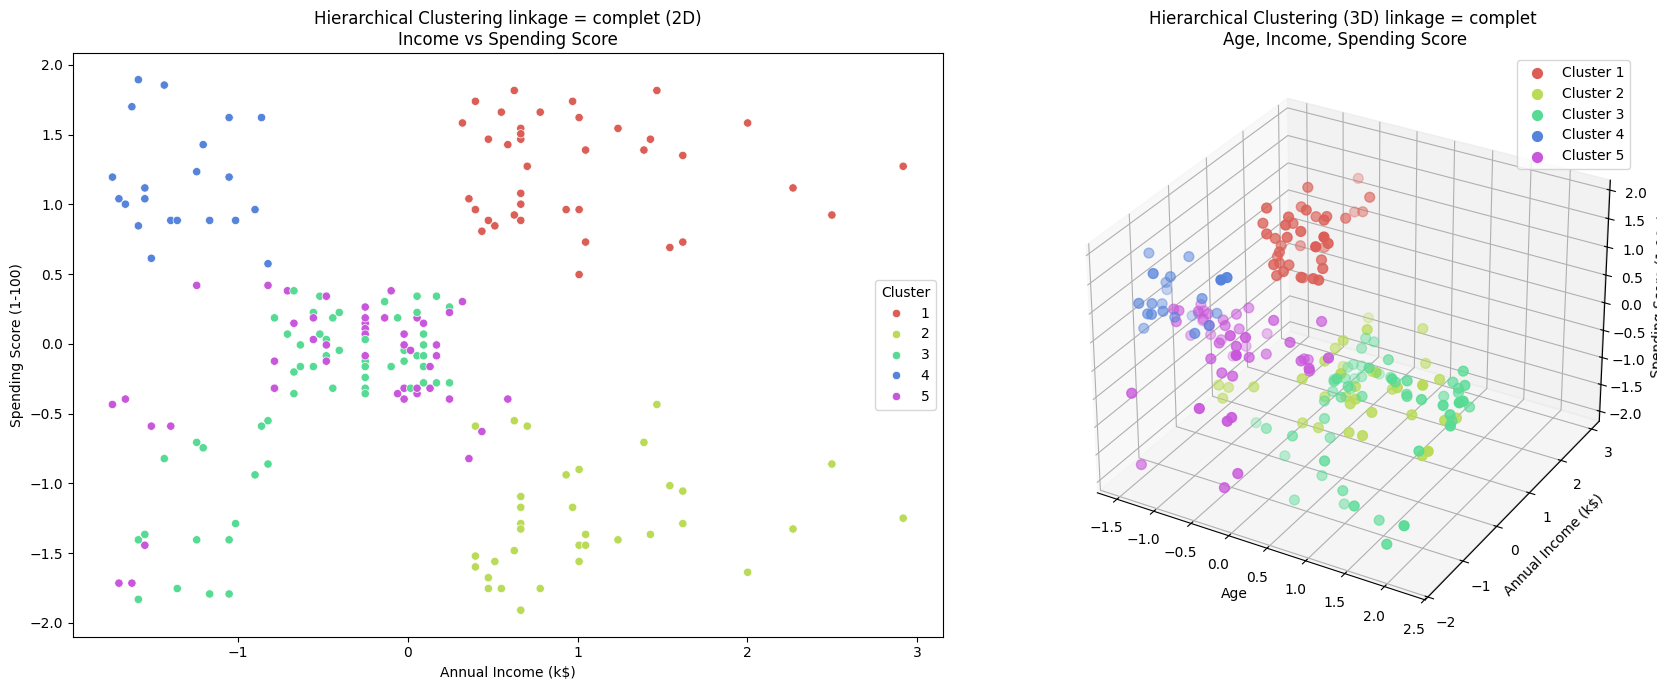

In [ ]:
dist = pdist(df_numeric, metric='euclidean')
Z = hierarchy.linkage(dist, method='complete')
labels = hierarchy.fcluster(Z, t=5, criterion='maxclust')
df['Labels'] = labels

# Create figure with 1 row and 2 columns
plt.figure(figsize=(18, 7))  # Wider figure to accommodate both plots

# --- LEFT PLOT: 2D Scatter ---
plt.subplot(1, 2, 1)  # 1 row, 2 cols, position 1
sns.scatterplot(data=df,
                x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='Labels',
                palette=sns.color_palette('hls', 5))
plt.title('Hierarchical Clustering linkage = complet (2D)\nIncome vs Spending Score')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')

# --- RIGHT PLOT: 3D Scatter ---
ax = plt.subplot(1, 2, 2, projection='3d')  # Position 2 with 3D projection
unique_labels = df['Labels'].unique()
palette = sns.color_palette('hls', len(unique_labels))

for label, color in zip(sorted(unique_labels), palette):
    cluster_data = df[df['Labels'] == label]
    ax.scatter(cluster_data['Age'],
               cluster_data['Annual Income (k$)'],
               cluster_data['Spending Score (1-100)'],
               label=f'Cluster {label}',
               color=color,
               s=50)

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Hierarchical Clustering (3D) linkage = complet \nAge, Income, Spending Score')
ax.legend()

# Adjust layout and show
plt.tight_layout()
plt.show()

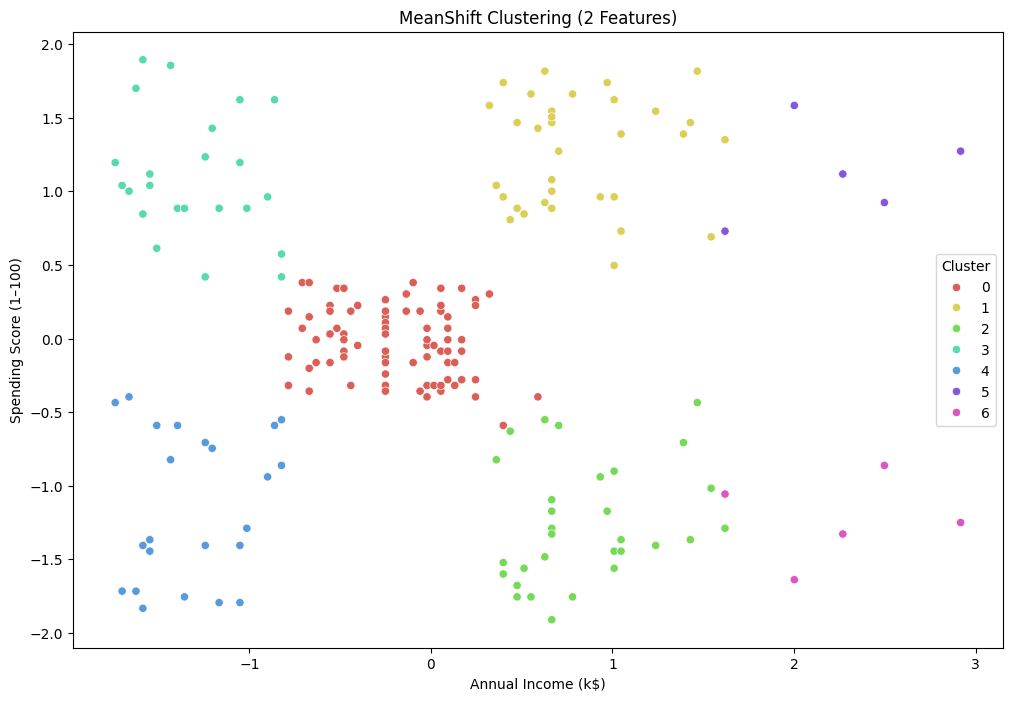

In [ ]:
dataset_2d = df[['Annual Income (k$)', 'Spending Score (1-100)']].copy()
dataset_2d.columns = ['Income', 'Score']

bandwidth = estimate_bandwidth(dataset_2d, quantile=0.1)

ms = MeanShift(bandwidth=bandwidth).fit(dataset_2d)

dataset_2d['Labels'] = ms.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(data=dataset_2d, x='Income', y='Score', hue='Labels',
                palette=sns.color_palette('hls', len(np.unique(ms.labels_))))
plt.title('MeanShift Clustering (2 Features)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend(title='Cluster')
plt.show()


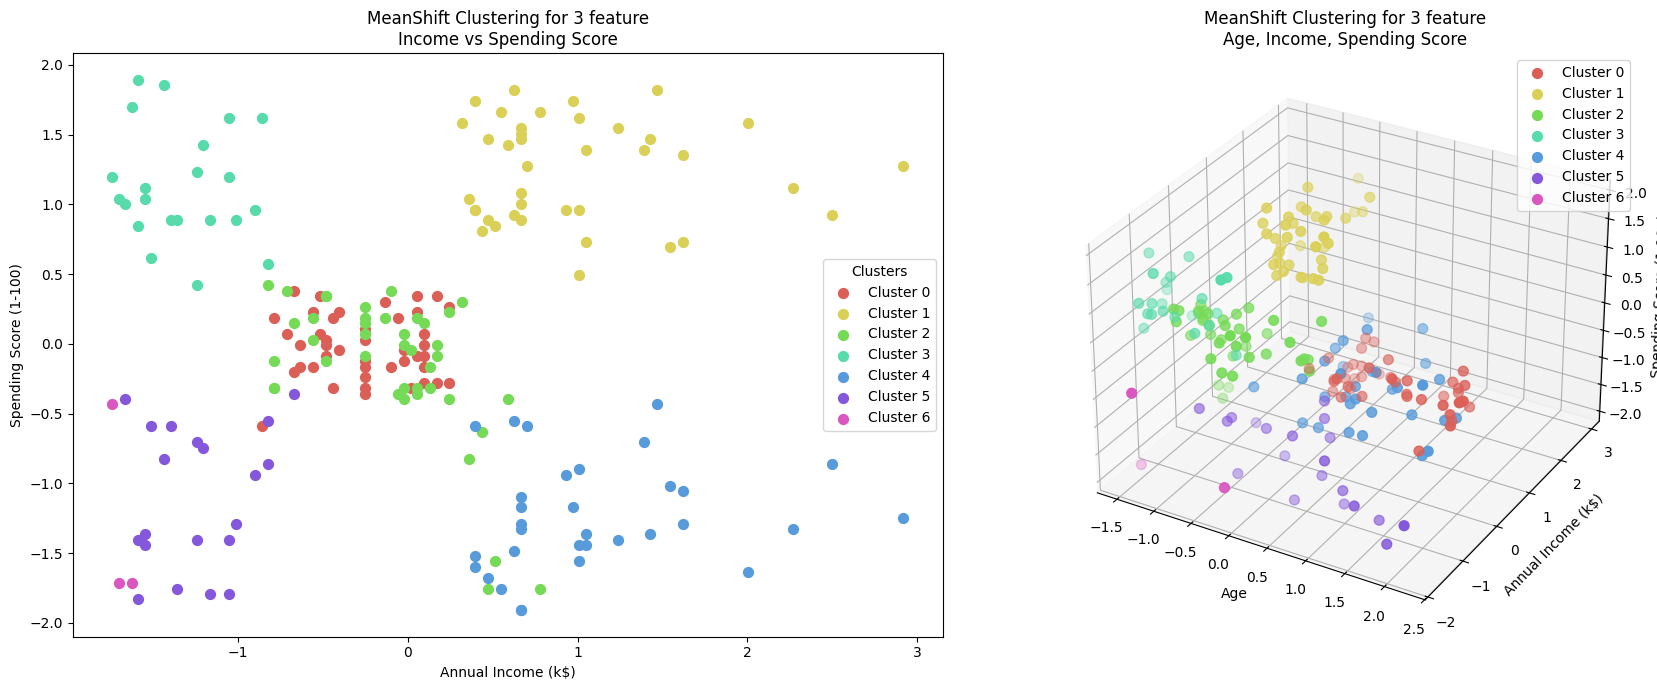

Number of clusters found: 7


In [ ]:

dataset_3d = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].copy()
dataset_3d.columns = ['Age', 'Income', 'Score']
bandwidth_3d = estimate_bandwidth(dataset_3d, quantile=0.1)
ms3 = MeanShift(bandwidth=bandwidth_3d).fit(dataset_3d)
dataset_3d['Labels'] = ms3.labels_
unique_labels = np.unique(ms3.labels_)
n_clusters = len(unique_labels)

# Create figure with 1 row and 2 columns
plt.figure(figsize=(18, 7))  # Wider figure for side-by-side plots
colors = sns.color_palette('hls', n_clusters)

# --- LEFT PLOT: 2D Scatter ---
plt.subplot(1, 2, 1)
for label, color in zip(unique_labels, colors):
    cluster_data = dataset_3d[dataset_3d['Labels'] == label]
    plt.scatter(cluster_data['Income'],
               cluster_data['Score'],
               color=color,
               label=f'Cluster {label}',
               s=50)
plt.title('MeanShift Clustering for 3 feature\nIncome vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Clusters')

# --- RIGHT PLOT: 3D Scatter ---
ax = plt.subplot(1, 2, 2, projection='3d')
for label, color in zip(unique_labels, colors):
    cluster_data = dataset_3d[dataset_3d['Labels'] == label]
    ax.scatter(cluster_data['Age'],
               cluster_data['Income'],
               cluster_data['Score'],
               color=color,
               label=f'Cluster {label}',
               s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('MeanShift Clustering for 3 feature\nAge, Income, Spending Score')
ax.legend()

plt.tight_layout()
plt.show()

# Print cluster count
print(f"Number of clusters found: {n_clusters}")
